# 导入工具包

In [5]:
# opencv-python
import cv2

import numpy as np

# mediapipe人工智能工具包
import mediapipe as mp

# 进度条库
from tqdm import tqdm

# 时间库
import time

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

In [6]:
# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 导入模型、输入图像、获取预测结果、可视化

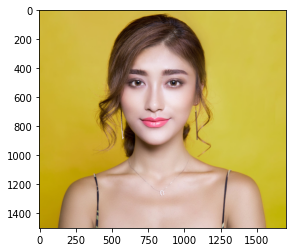

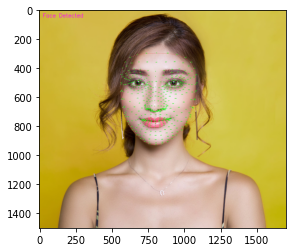

True

In [7]:
# 导入三维人脸关键点检测模型
mp_face_mesh = mp.solutions.face_mesh
model = mp_face_mesh.FaceMesh(   
        static_image_mode=True,      # 是静态图片还是连续视频帧
        refine_landmarks=True,       # 使用注意力机制Attention Mesh Model，对嘴唇、眼睛、瞳孔周围的关键点精细定位
        max_num_faces=5,              # 最多检测几张脸
        min_detection_confidence=0.5, # 置信度阈值
        min_tracking_confidence=0.5,  # 追踪阈值
)

# 导入可视化绘图函数
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1, color=[66,77,229])

# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('person3.jpeg')

look_img(img)

# 获取图像宽高
h,w = img.shape[0], img.shape[1]
# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 将RGB图像输入模型，获取预测结果
results = model.process(img_RGB)

# 文字大小
scaler = 1

if results.multi_face_landmarks: # 如果检测出人脸

        for face_landmarks in results.multi_face_landmarks: # 遍历每一张脸
            mp_drawing.draw_landmarks(
                  image=img,
                  landmark_list=face_landmarks,
                  connections=mp_face_mesh.FACEMESH_CONTOURS,
                  landmark_drawing_spec=drawing_spec,
                  connection_drawing_spec=drawing_spec)
            
            for idx, coord in enumerate(face_landmarks.landmark): # 遍历每一个关键点
                cx = int(coord.x * w)
                cy = int(coord.y * h)
                # 图片，添加的文字，左上角坐标，字体，字体大小，颜色，字体粗细
                img = cv2.putText(img, 'Face Detected', (25 * scaler, 50 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)
                img = cv2.putText(img, str(idx), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.2*scaler, (0, 255, 0), 1)
else:
    img = cv2.putText(img, 'No Face Detected', (25 * scaler, 50 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)

look_img(img)

cv2.imwrite("face_id.jpg",img)

In [8]:
cv2.imwrite("face_id.jpg",img)

True

# 五眼

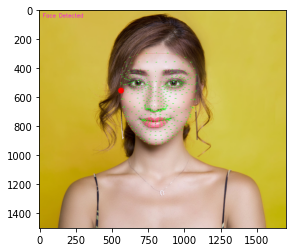

In [9]:
# 脸轮廓最左点：234
FL = results.multi_face_landmarks[0].landmark[234]; FL_X, FL_Y = int(FL.x * w), int(FL.y * h); FL_Color = (0,0,255)
img = cv2.circle(img,(FL_X, FL_Y), 20, FL_Color, -1)
look_img(img)

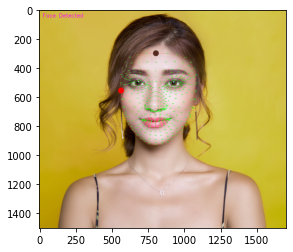

In [10]:
# 脸上边缘：10
FT = results.multi_face_landmarks[0].landmark[10]; FT_X, FT_Y = int(FT.x * w), int(FT.y * h); FT_Color = (31,41,81)
img = cv2.circle(img,(FT_X, FT_Y), 20, FT_Color, -1)
look_img(img)

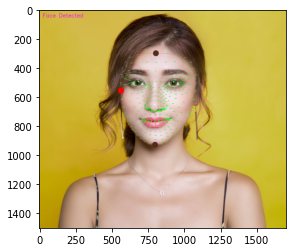

In [11]:
# 脸下边缘：152
FB = results.multi_face_landmarks[0].landmark[152]; FB_X, FB_Y = int(FB.x * w), int(FB.y * h); FB_Color = (31,41,81)
img = cv2.circle(img,(FB_X, FB_Y), 20, FB_Color, -1)
look_img(img)

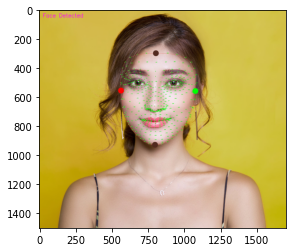

In [12]:
# 脸轮廓最右点：454
FR = results.multi_face_landmarks[0].landmark[454]; FR_X, FR_Y = int(FR.x * w), int(FR.y * h); FR_Color = (0,255,0)
img = cv2.circle(img,(FR_X, FR_Y), 20, FR_Color, -1)
look_img(img)

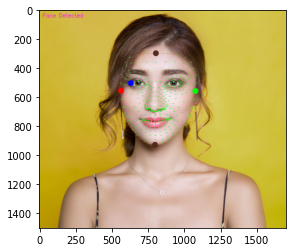

In [13]:
# 左边眼睛左眼角：33
ELL = results.multi_face_landmarks[0].landmark[33]; ELL_X, ELL_Y = int(ELL.x * w), int(ELL.y * h); ELL_Color = (255,0,0)
img = cv2.circle(img,(ELL_X, ELL_Y), 20, ELL_Color, -1)
look_img(img)

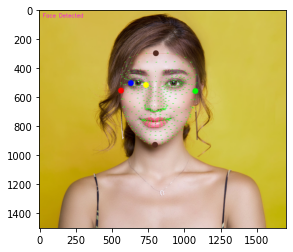

In [14]:
# 左边眼睛右眼角：133
ELR = results.multi_face_landmarks[0].landmark[133]; ELR_X, ELR_Y = int(ELR.x * w), int(ELR.y * h); ELR_Color = (0,255,255)
img = cv2.circle(img,(ELR_X, ELR_Y), 20, ELR_Color, -1)
look_img(img)

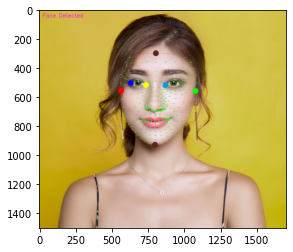

In [15]:
# 右边眼睛左眼角：362
ERL = results.multi_face_landmarks[0].landmark[362]; ERL_X, ERL_Y = int(ERL.x * w), int(ERL.y * h); ERL_Color = (223,155,6)
img = cv2.circle(img,(ERL_X, ERL_Y), 20, ERL_Color, -1)
look_img(img)

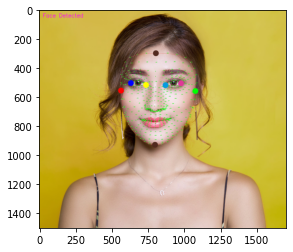

In [16]:
# 右边眼睛右眼角：263
ERR = results.multi_face_landmarks[0].landmark[263]; ERR_X, ERR_Y = int(ERR.x * w), int(ERR.y * h); ERR_Color = (151,57,224)
img = cv2.circle(img,(ERR_X, ERR_Y), 20, ERR_Color, -1)
look_img(img)

In [17]:
# 从左往右六个点的横坐标
Six_X = np.array([FL_X, ELL_X, ELR_X, ERL_X, ERR_X, FR_X])

# 从最左到最右的距离
Left_Right = FR_X - FL_X

# 从左往右六个点间隔的五个距离，并归一化
Five_Distance = 100 * np.diff(Six_X) / Left_Right

In [18]:
Five_Distance

array([13.28125  , 20.3125   , 26.171875 , 20.8984375, 19.3359375])

五个距离中，第二个距离为左侧眼睛的宽度，第四个距离为右侧眼睛的宽度

In [19]:
# 两眼宽度的平均值
Eye_Width_Mean = np.mean([Five_Distance[1], Five_Distance[3]])

In [20]:
Eye_Width_Mean

20.60546875

In [21]:
# 五个距离 分别 与 两眼宽度均值 的差
Five_Eye_Diff = Five_Distance - Eye_Width_Mean

In [22]:
Five_Eye_Diff

array([-7.32421875, -0.29296875,  5.56640625,  0.29296875, -1.26953125])

In [23]:
# 求L2范数，作为颜值的“五眼”评价指标
Five_Eye_Metrics = np.linalg.norm(Five_Eye_Diff)

In [24]:
Five_Eye_Metrics

9.295828624150205

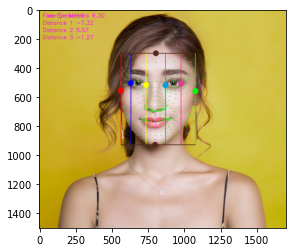

In [25]:
cv2.line(img,(FL_X, FT_Y),(FL_X, FB_Y), FL_Color, 3)
cv2.line(img,(ELL_X, FT_Y),(ELL_X, FB_Y), ELL_Color, 3)
cv2.line(img,(ELR_X, FT_Y),(ELR_X, FB_Y), ELR_Color, 3)
cv2.line(img,(ERL_X, FT_Y),(ERL_X, FB_Y), ERL_Color, 3)
cv2.line(img,(ERR_X, FT_Y),(ERR_X, FB_Y), ERR_Color, 3)
cv2.line(img,(FR_X, FT_Y),(FR_X, FB_Y), FR_Color, 3)
cv2.line(img,(FL_X, FT_Y),(FR_X, FT_Y), FT_Color, 3)
cv2.line(img,(FL_X, FB_Y),(FR_X, FB_Y), FB_Color, 3)

scaler = 1
img = cv2.putText(img, 'Five Eye Metrics {:.2f}'.format(Five_Eye_Metrics), (25 * scaler, 50 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)
img = cv2.putText(img, 'Distance 1 {:.2f}'.format(Five_Eye_Diff[0]), (25 * scaler, 100 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)
img = cv2.putText(img, 'Distance 2 {:.2f}'.format(Five_Eye_Diff[2]), (25 * scaler, 150 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)
img = cv2.putText(img, 'Distance 3 {:.2f}'.format(Five_Eye_Diff[4]), (25 * scaler, 200 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)
look_img(img)

# 整理代码

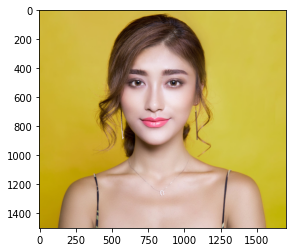

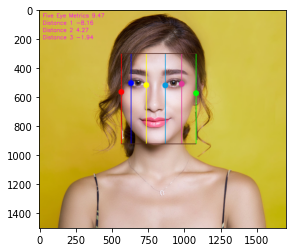

True

In [26]:
# opencv-python
import cv2

import numpy as np

# mediapipe人工智能工具包
import mediapipe as mp

# 进度条库
from tqdm import tqdm

# 时间库
import time

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()
    
mp_face_mesh = mp.solutions.face_mesh
model = mp_face_mesh.FaceMesh(
                        static_image_mode=True,      # 是静态图片还是连续视频帧
                        max_num_faces=2,              # 最多检测几张脸
                        min_detection_confidence=0.5, # 置信度阈值
                        min_tracking_confidence=0.5,  # 追踪阈值
                    )
# 导入可视化绘图函数
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1, color=[66,77,229])

# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('person3.jpeg')

look_img(img)

# 获取图像宽高
h,w = img.shape[0], img.shape[1]
# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 将RGB图像输入模型，获取预测结果
results = model.process(img_RGB)

# 文字大小
scaler = 1

if results.multi_face_landmarks: # 如果检测出人脸
    
    # 获取相关关键点坐标
    # 脸轮廓最左点
    FL = results.multi_face_landmarks[0].landmark[234]; FL_X, FL_Y = int(FL.x * w), int(FL.y * h); FL_Color = (0,0,255)
    img = cv2.circle(img,(FL_X, FL_Y), 20, FL_Color, -1)
    # 脸上边缘
    FT = results.multi_face_landmarks[0].landmark[10]; FT_X, FT_Y = int(FT.x * w), int(FT.y * h); FT_Color = (31,41,81)
    # img = cv2.circle(img,(FT_X, FT_Y), 20, FT_Color, -1)
    # 脸下边缘
    FB = results.multi_face_landmarks[0].landmark[152]; FB_X, FB_Y = int(FB.x * w), int(FB.y * h); FB_Color = (31,41,81)
    # img = cv2.circle(img,(FB_X, FB_Y), 20, FB_Color, -1)
    # 脸轮廓最右点
    FR = results.multi_face_landmarks[0].landmark[454]; FR_X, FR_Y = int(FR.x * w), int(FR.y * h); FR_Color = (0,255,0)
    img = cv2.circle(img,(FR_X, FR_Y), 20, FR_Color, -1)
    # 左边眼睛左眼角
    ELL = results.multi_face_landmarks[0].landmark[33]; ELL_X, ELL_Y = int(ELL.x * w), int(ELL.y * h); ELL_Color = (255,0,0)
    img = cv2.circle(img,(ELL_X, ELL_Y), 20, ELL_Color, -1)
    # 左边眼睛右眼角
    ELR = results.multi_face_landmarks[0].landmark[133]; ELR_X, ELR_Y = int(ELR.x * w), int(ELR.y * h); ELR_Color = (0,255,255)
    img = cv2.circle(img,(ELR_X, ELR_Y), 20, ELR_Color, -1)
    # 右边眼睛左眼角
    ERL = results.multi_face_landmarks[0].landmark[362]; ERL_X, ERL_Y = int(ERL.x * w), int(ERL.y * h); ERL_Color = (223,155,6)
    img = cv2.circle(img,(ERL_X, ERL_Y), 20, ERL_Color, -1)
    # 右边眼睛右眼角
    ERR = results.multi_face_landmarks[0].landmark[263]; ERR_X, ERR_Y = int(ERR.x * w), int(ERR.y * h); ERR_Color = (151,57,224)
    img = cv2.circle(img,(ERR_X, ERR_Y), 20, ERR_Color, -1)
    
    # 计算“五眼指标”
    # 从左往右六个点的横坐标
    Six_X = np.array([FL_X, ELL_X, ELR_X, ERL_X, ERR_X, FR_X])
    # 从最左到最右的距离
    Left_Right = FR_X - FL_X
    # 从左往右六个点间隔的五个距离，并归一化
    Five_Distance = 100 * np.diff(Six_X) / Left_Right
    # 两眼宽度的平均值
    Eye_Width_Mean = np.mean([Five_Distance[1], Five_Distance[3]])
    # 五个距离 与 两眼宽度均值 的差
    Five_Eye_Diff = Five_Distance - Eye_Width_Mean
    # 求L2范数，作为颜值的“五眼”评价指标
    Five_Eye_Metrics = np.linalg.norm(Five_Eye_Diff)
    cv2.line(img,(FL_X, FT_Y),(FL_X, FB_Y), FL_Color, 3)
    cv2.line(img,(ELL_X, FT_Y),(ELL_X, FB_Y), ELL_Color, 3)
    cv2.line(img,(ELR_X, FT_Y),(ELR_X, FB_Y), ELR_Color, 3)
    cv2.line(img,(ERL_X, FT_Y),(ERL_X, FB_Y), ERL_Color, 3)
    cv2.line(img,(ERR_X, FT_Y),(ERR_X, FB_Y), ERR_Color, 3)
    cv2.line(img,(FR_X, FT_Y),(FR_X, FB_Y), FR_Color, 3)
    cv2.line(img,(FL_X, FT_Y),(FR_X, FT_Y), FT_Color, 3)
    cv2.line(img,(FL_X, FB_Y),(FR_X, FB_Y), FB_Color, 3)

    scaler = 1
    img = cv2.putText(img, 'Five Eye Metrics {:.2f}'.format(Five_Eye_Metrics), (25 * scaler, 50 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)
    img = cv2.putText(img, 'Distance 1 {:.2f}'.format(Five_Eye_Diff[0]), (25 * scaler, 100 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)
    img = cv2.putText(img, 'Distance 2 {:.2f}'.format(Five_Eye_Diff[2]), (25 * scaler, 150 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)
    img = cv2.putText(img, 'Distance 3 {:.2f}'.format(Five_Eye_Diff[4]), (25 * scaler, 200 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)
    
else:
    img = cv2.putText(img, 'No Face Detected', (25 * scaler, 50 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 1.25 * scaler, (255, 0, 255), 2 * scaler)

look_img(img)

cv2.imwrite("five_eye_test.jpg",img)